In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train_dataset = pd.read_csv("../datasets/train.csv")

In [3]:
train_dataset.select_dtypes(exclude = 'object')
train_dataset.select_dtypes(include = 'object')

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,785,905377130,30,NaN,12342,4,5,1940,1950,0.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,189,140,0,0,0,0,11,2009,144000


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2047,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
2048,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD
2049,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD


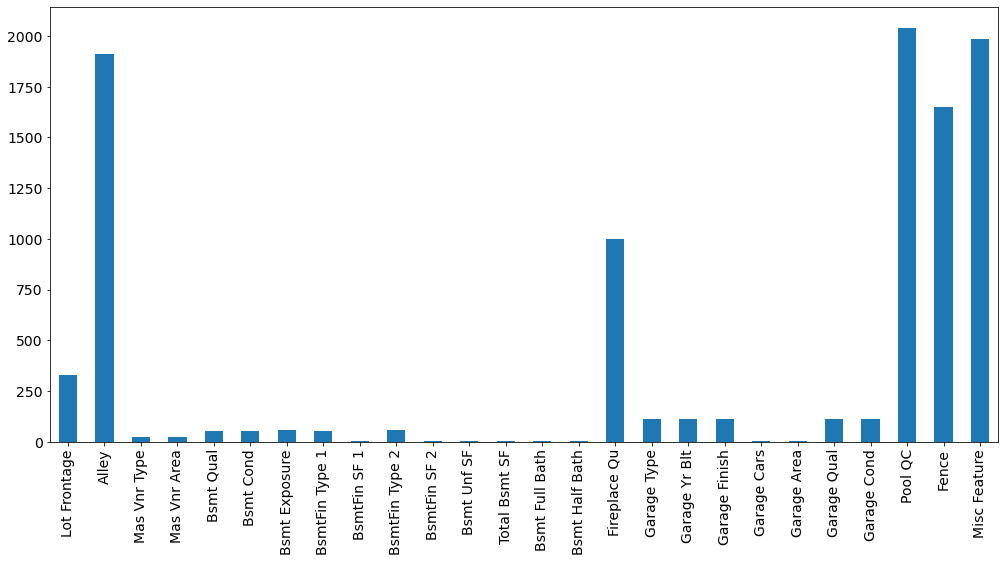

In [4]:
#Columns with missing values
plt.figure(figsize = (17,8))
c = train_dataset.isnull().sum()
c = c[c > 0]
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
c.plot.bar();

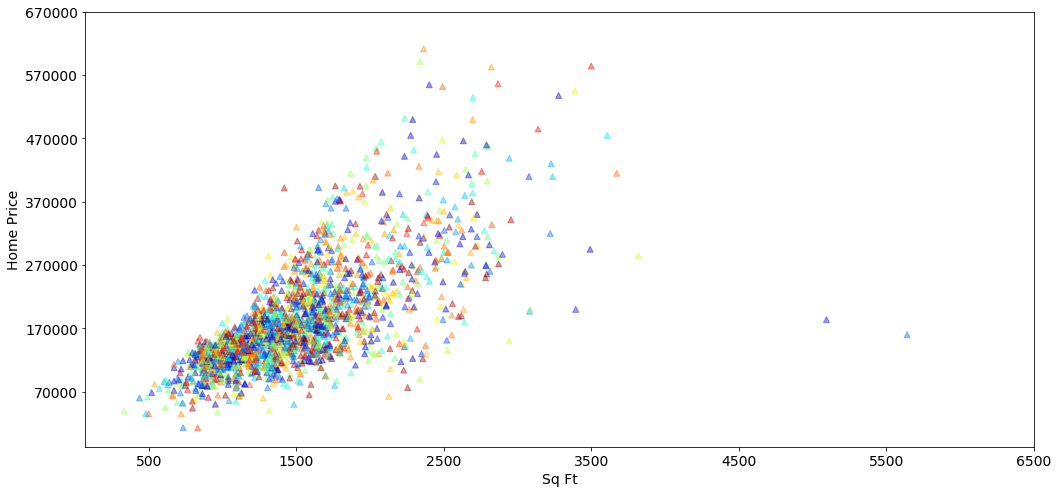

In [14]:
rng = np.random.RandomState(0)
colors = rng.rand(len(train_dataset))

plt.figure(figsize=(17,8))
plt.scatter(train_dataset["Gr Liv Area"],train_dataset['SalePrice'], cmap = 'jet', 
            marker = '^', alpha = 0.4, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,720_000,100_000),fontsize = 14)
plt.xlabel('Sq Ft',{'fontsize' : 14})
plt.xticks(np.arange(500,7000,1000),fontsize = 14);

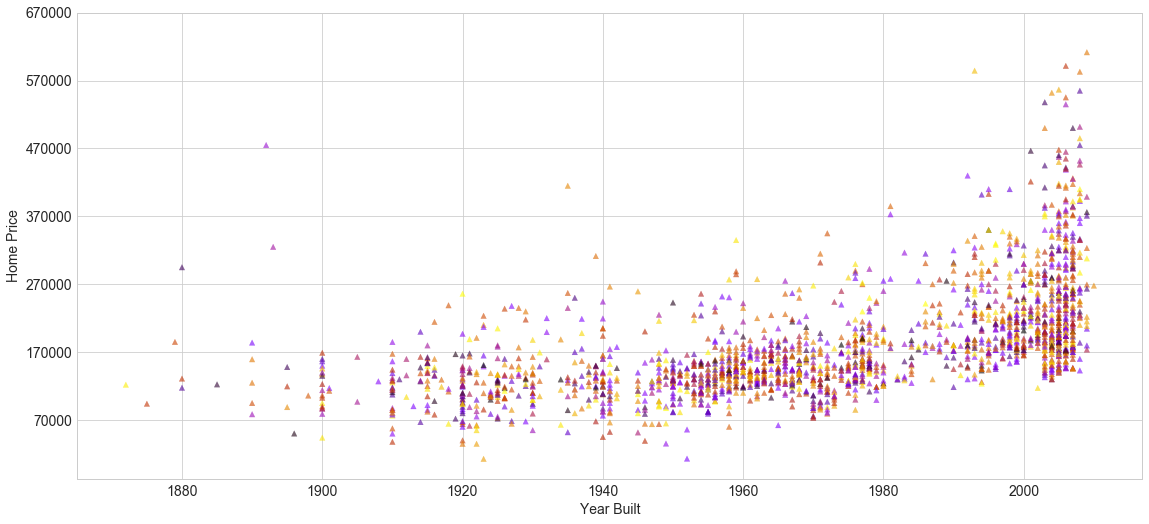

In [46]:
rng = np.random.RandomState(0)
colors = rng.rand(len(train_dataset))

plt.figure(figsize=(17,8))
plt.scatter(train_dataset["Year Built"],train_dataset['SalePrice'], cmap = 'gnuplot', 
            marker = '^', alpha = 0.6, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,720_000,100_000),fontsize = 14)
plt.xlabel('Year Built',{'fontsize' : 14})
plt.xticks(np.arange(1880,2020,20),fontsize = 14);

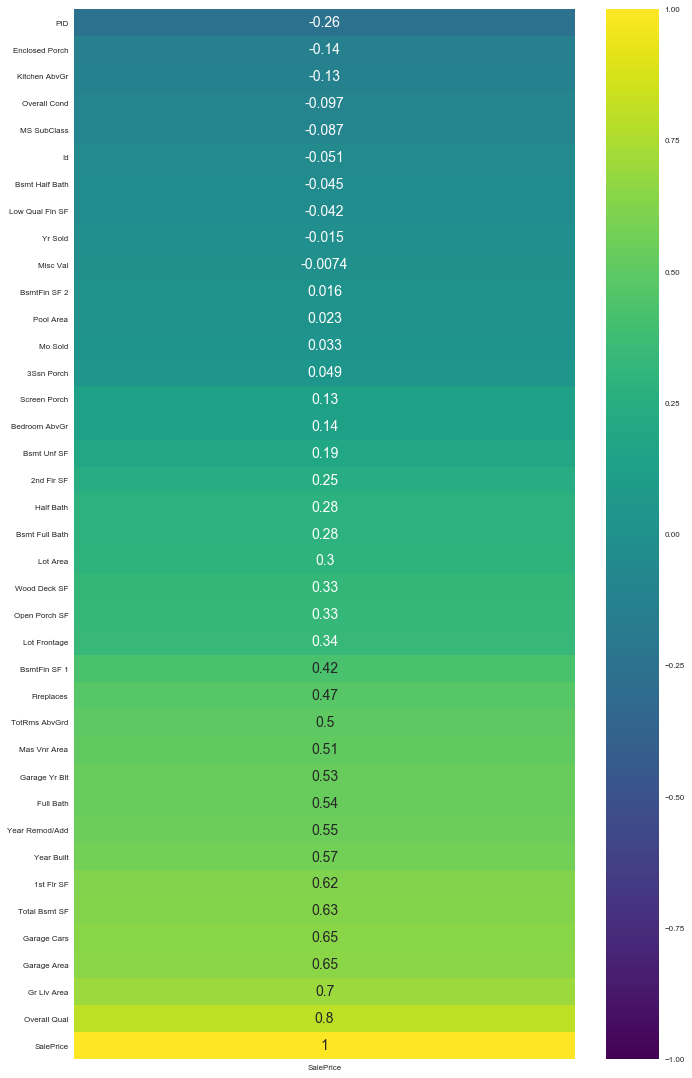

In [39]:
plt.figure(figsize=(10, 18))
sns.heatmap(train_dataset.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            cmap='viridis',
            vmin=-1, 
            vmax = 1);

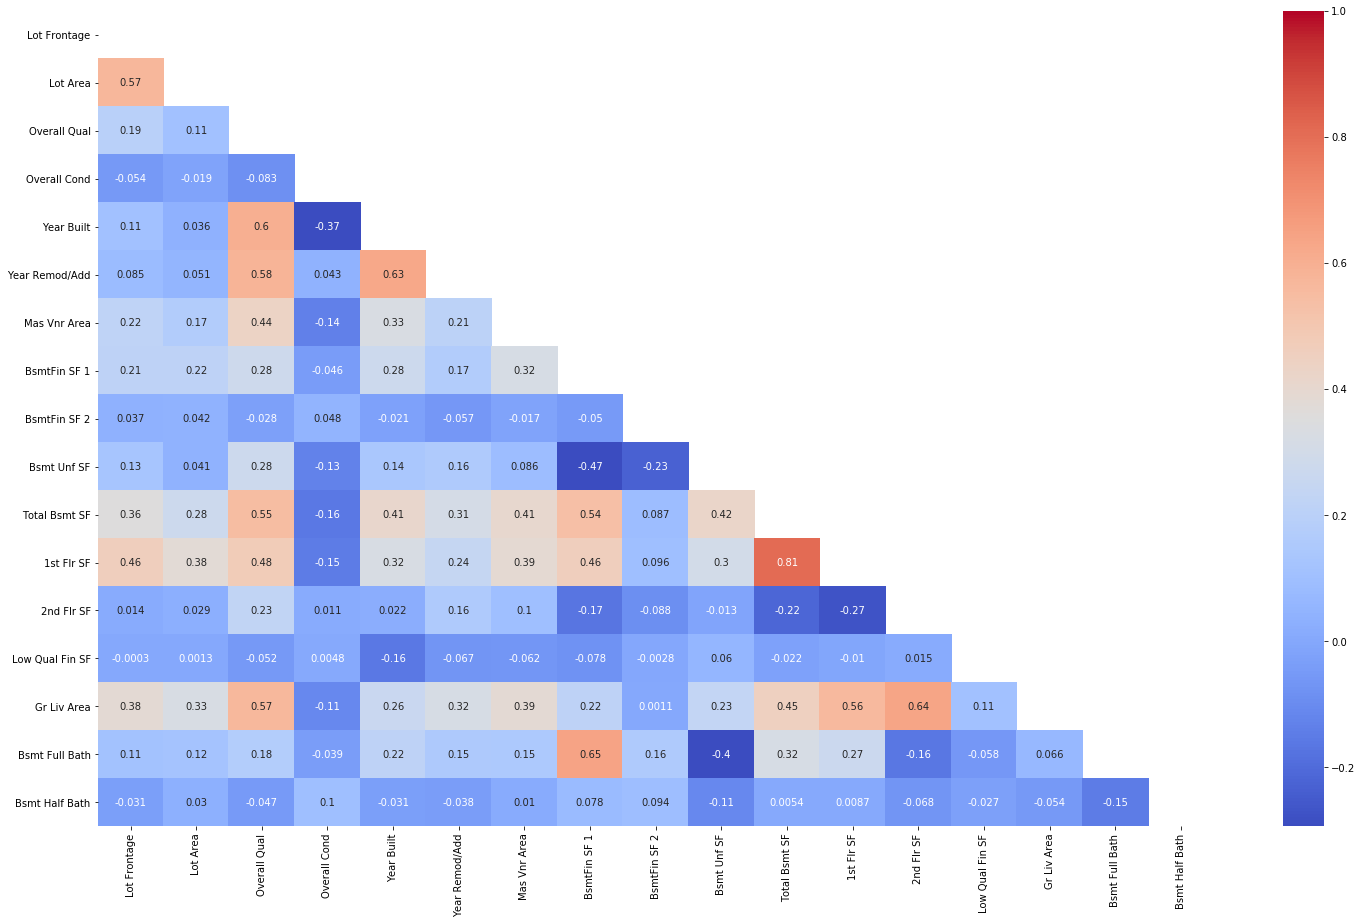

In [15]:
plt.figure(figsize=(25,15))

correlation = train_dataset.corr()
zz = correlation.iloc[3:20,3:20]
mask = np.zeros_like(zz)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(zz,mask = mask,annot=True,cmap='coolwarm', robust = True);

#correlation['SalePrice'].sort_values(ascending=False)
#correlation.iloc[]

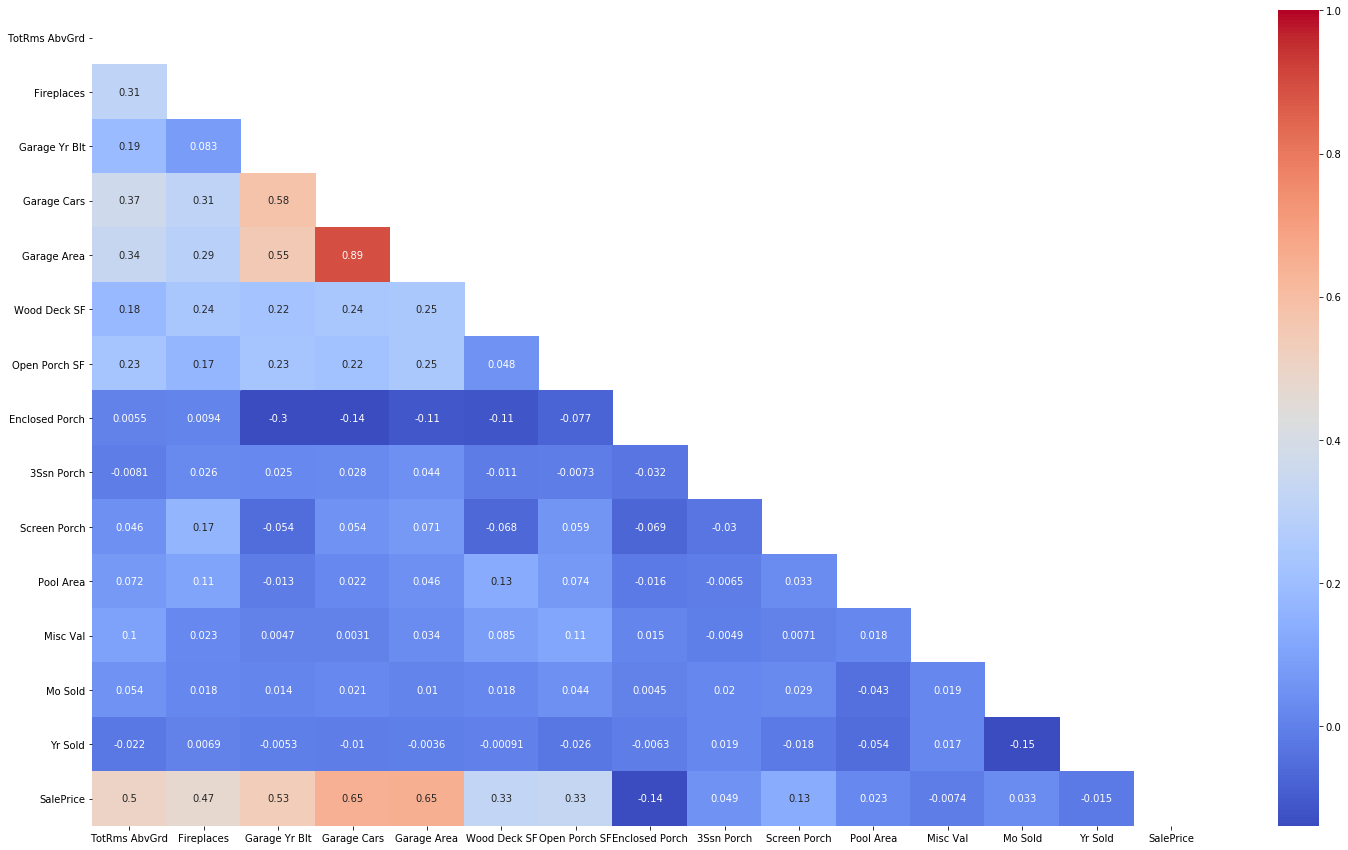

In [19]:
plt.figure(figsize=(25,15))
correlation = train_dataset.corr()

zz1 = correlation.iloc[24:39,24:39]
mask = np.zeros_like(zz1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(zz1,mask = mask,annot=True,cmap='coolwarm', robust = True);

### Sales price and other columns

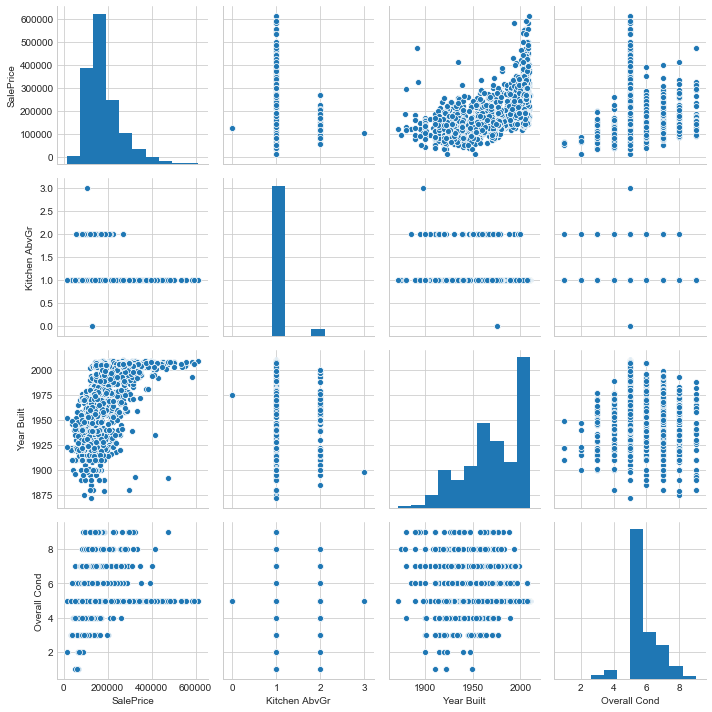

In [20]:
plt.style.use('seaborn-whitegrid')
plot_df = train_dataset[['SalePrice','Kitchen AbvGr','Year Built','Overall Cond']].copy()
sns.pairplot(plot_df,markers= 'o');
plt.tight_layout();

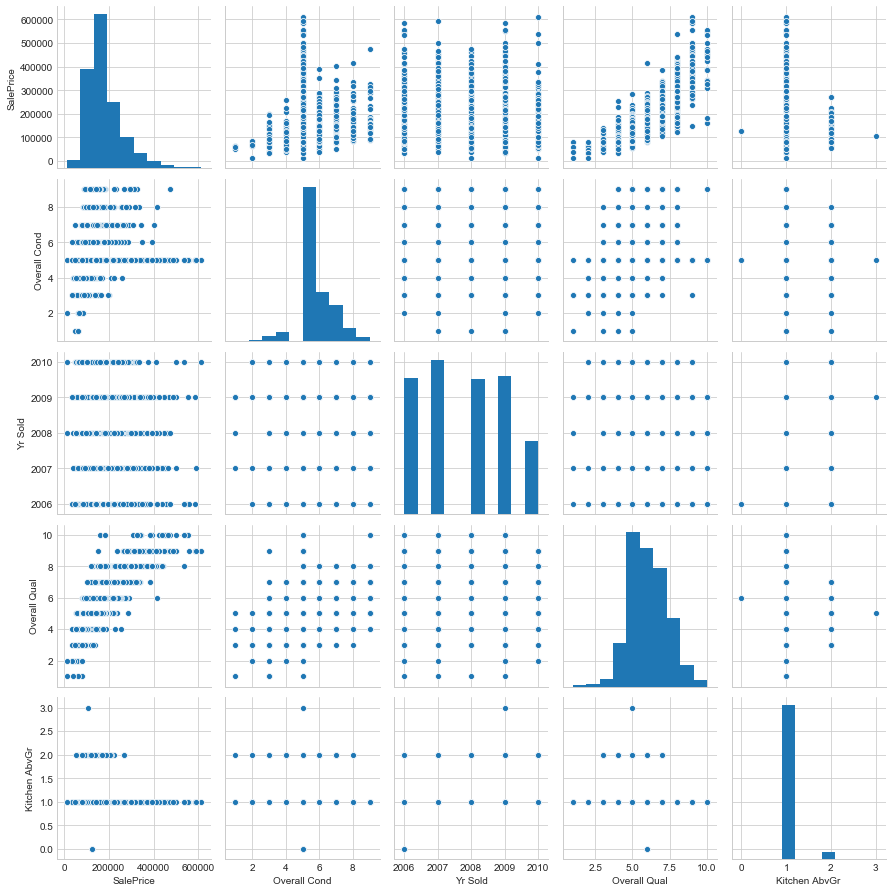

In [21]:
plt.style.use('seaborn-whitegrid')
plot_df = train_dataset[['SalePrice','Overall Cond','Yr Sold','Overall Qual','Kitchen AbvGr']].copy()
sns.pairplot(plot_df,markers= 'o')  
plt.tight_layout();

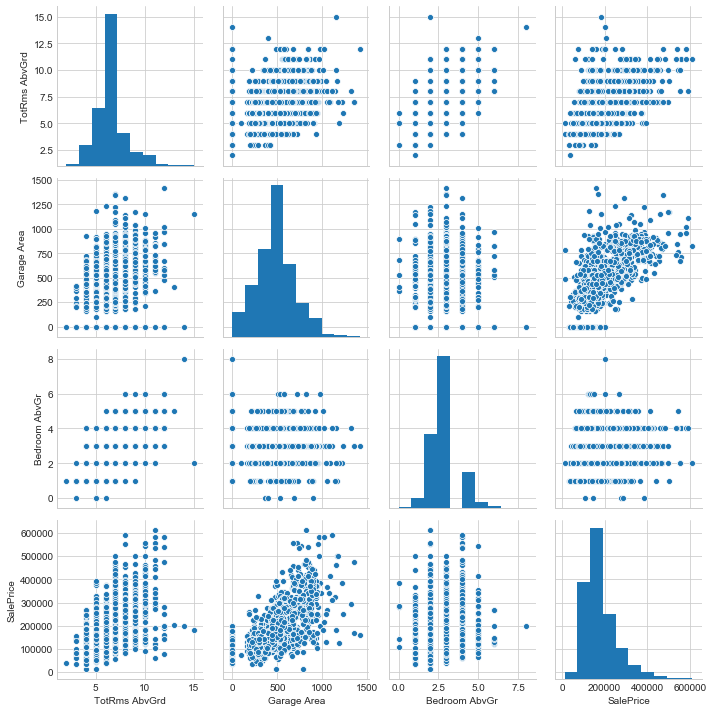

In [22]:
plt.style.use('seaborn-whitegrid')
plot_df = train_dataset[['TotRms AbvGrd','Garage Area','Bedroom AbvGr','SalePrice']].copy()
sns.pairplot(plot_df,markers= 'o') ;  
plt.tight_layout();

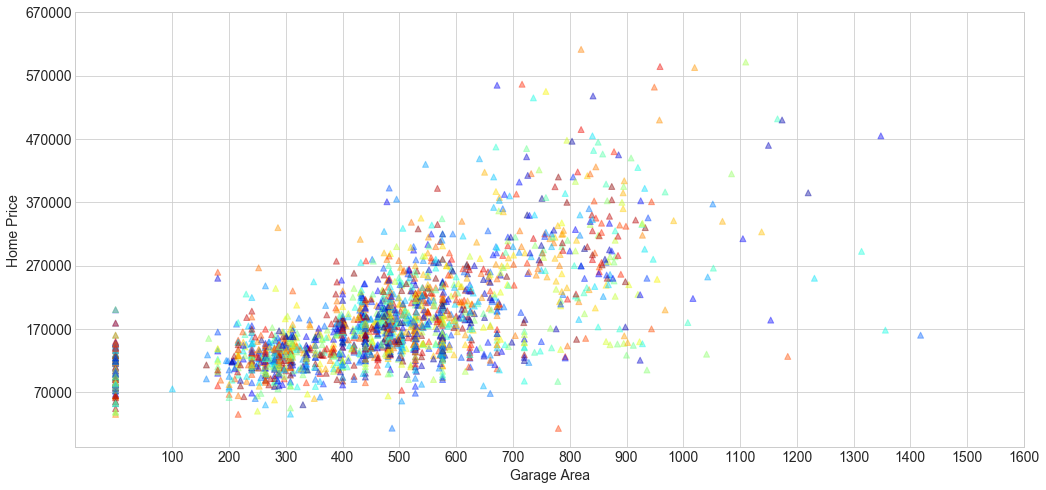

In [23]:
 plt.figure(figsize=(17,8))
plt.scatter(train_dataset["Garage Area"],train_dataset['SalePrice'], cmap = 'jet', 
            marker = '^', alpha = 0.4, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,720_000,100_000),fontsize = 14)
plt.xlabel('Garage Area',{'fontsize' : 14})
plt.xticks(np.arange(100,1700,100),fontsize = 14);

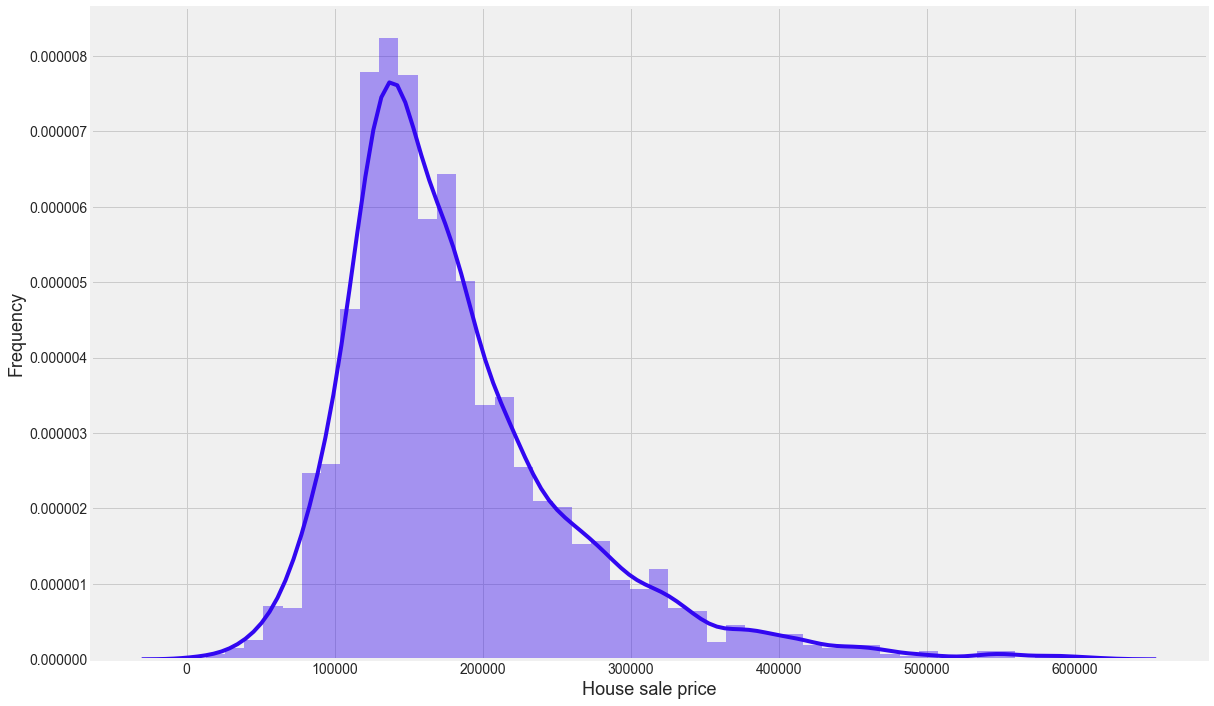

In [24]:
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.distplot(train_dataset['SalePrice'] , color = '#3207f1')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('House sale price',{'fontsize': 18})
plt.ylabel('Frequency',{'fontsize': 18});

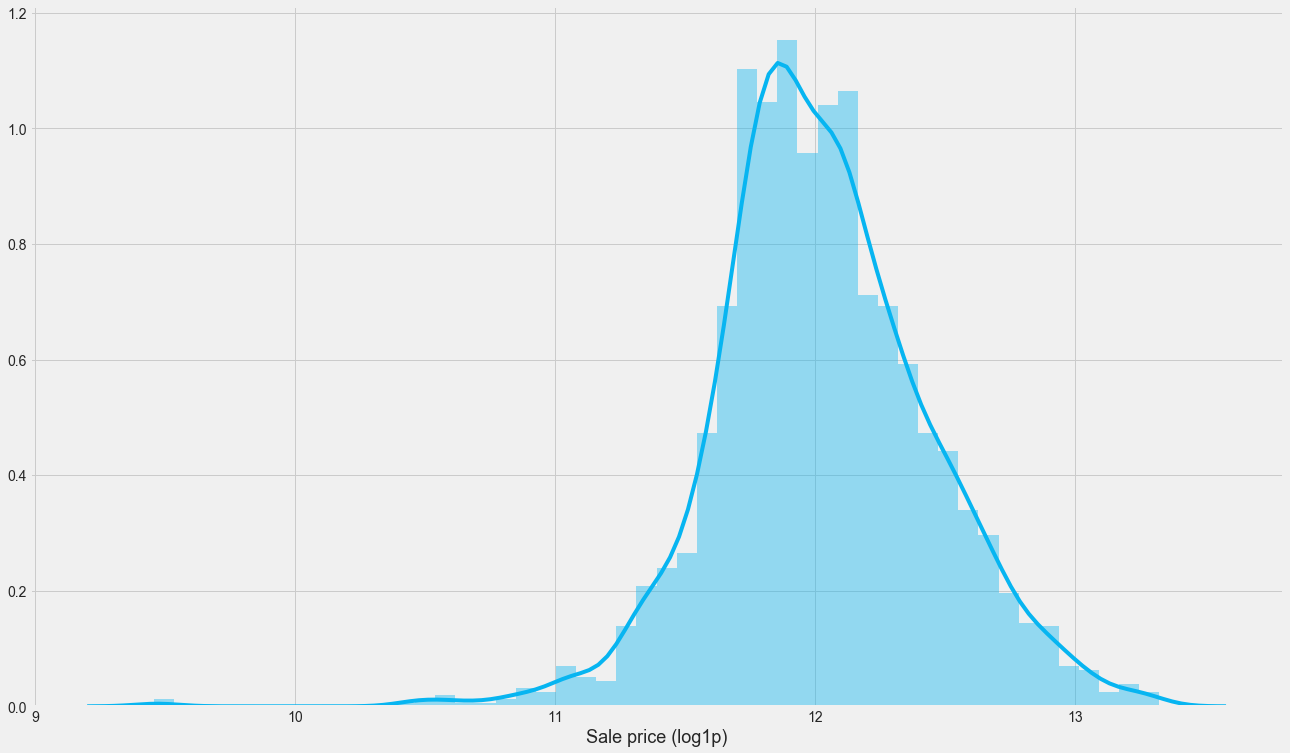

In [25]:
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.distplot(np.log1p(train_dataset['SalePrice']) , color = '#07b5f1')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Sale price (log1p)',{'fontsize': 18});


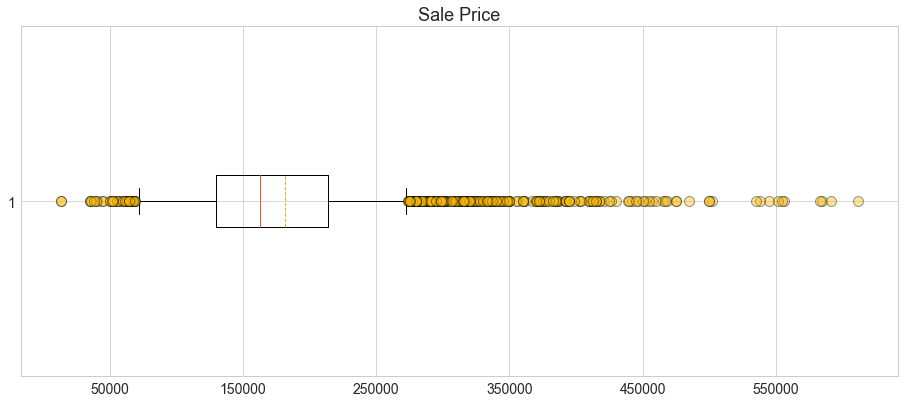

In [49]:
plt.figure(figsize=(14,6))
plt.style.use('seaborn-whitegrid')
plt.boxplot(x = [ train_dataset['SalePrice']], vert = False,showmeans = True,whis=0.7,meanline = True,
            flierprops = { 'marker' :'o', 'markerfacecolor' : '#f7ba0a' ,'markersize' : 10,'alpha' : 0.4}
           );

plt.title("Sale Price", fontsize = 18)
plt.xticks(np.arange(50_000,650_000,100_000),fontsize = 14)
plt.yticks(fontsize = 14)
plt.show();

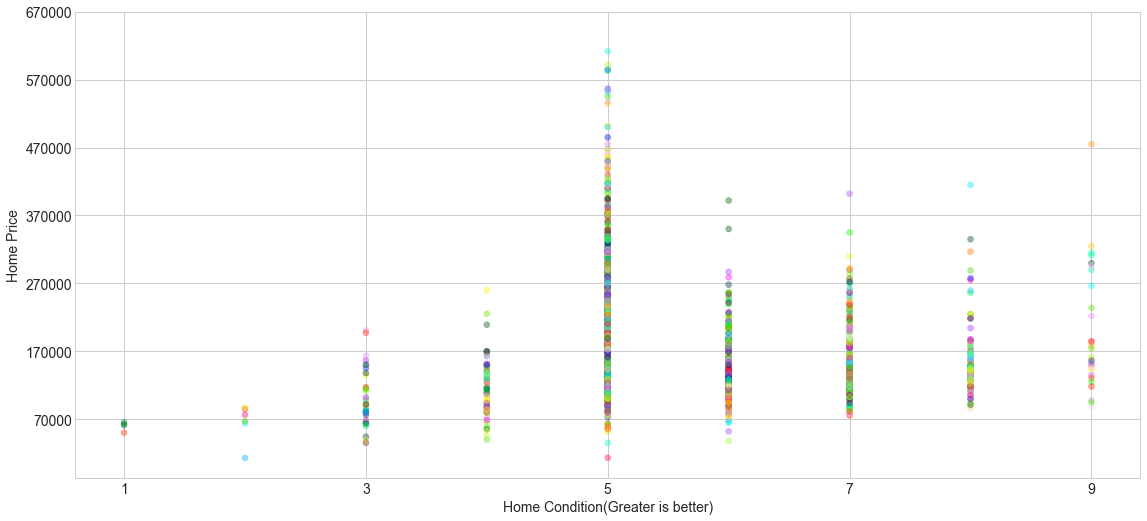

In [27]:

plt.figure(figsize=(17,8))
plt.style.use('fast')
rng = np.random.RandomState(0)
colors = rng.rand(len(train_dataset))

plt.scatter(train_dataset["Overall Cond"], train_dataset['SalePrice'],cmap = 'gist_ncar_r', 
            marker = 'o', alpha = 0.4, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,680_000,100_000),fontsize = 14)
plt.xlabel('Home Condition(Greater is better)',{'fontsize' : 14})
plt.xticks(np.arange(1,11,2),fontsize = 14);

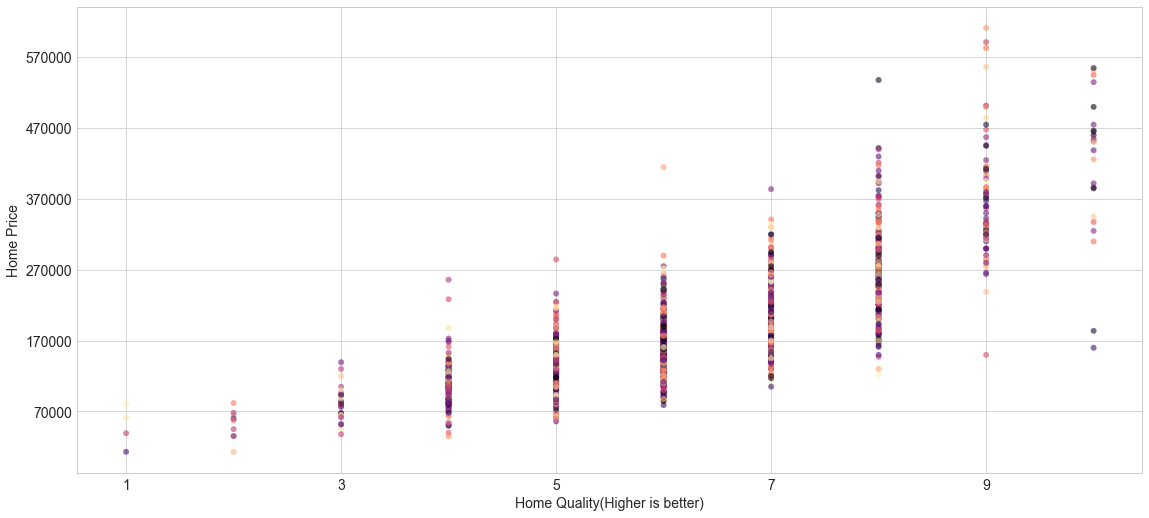

In [55]:
plt.figure(figsize=(17,8))
plt.style.use('seaborn-paper')
plt.scatter(train_dataset["Overall Qual"],train_dataset['SalePrice'], cmap = 'magma', 
            marker = 'o', alpha = 0.6, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,650_000,100_000),fontsize = 14)
plt.xlabel('Home Quality(Higher is better)',{'fontsize' : 14})
plt.xticks(np.arange(1,11,2),fontsize = 14);

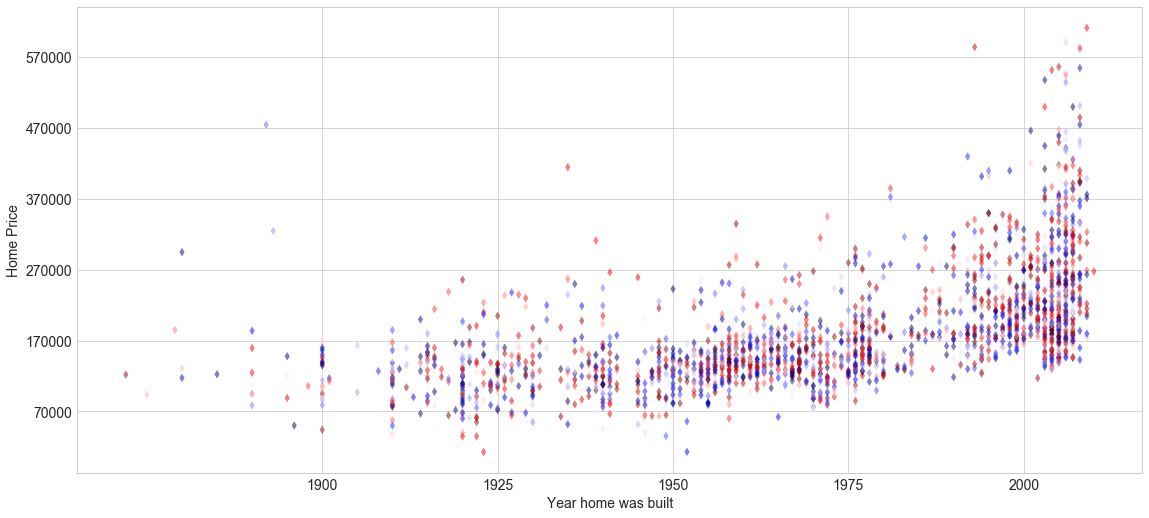

In [29]:
plt.figure(figsize=(17,8))
plt.style.use('seaborn-paper')
plt.scatter(train_dataset["Year Built"],train_dataset['SalePrice'], cmap = 'seismic', 
            marker = 'd', alpha = 0.5, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,650_000,100_000),fontsize = 14)
plt.xlabel('Year home was built',{'fontsize' : 14})
plt.xticks(np.arange(1900,2020,25),fontsize = 14);

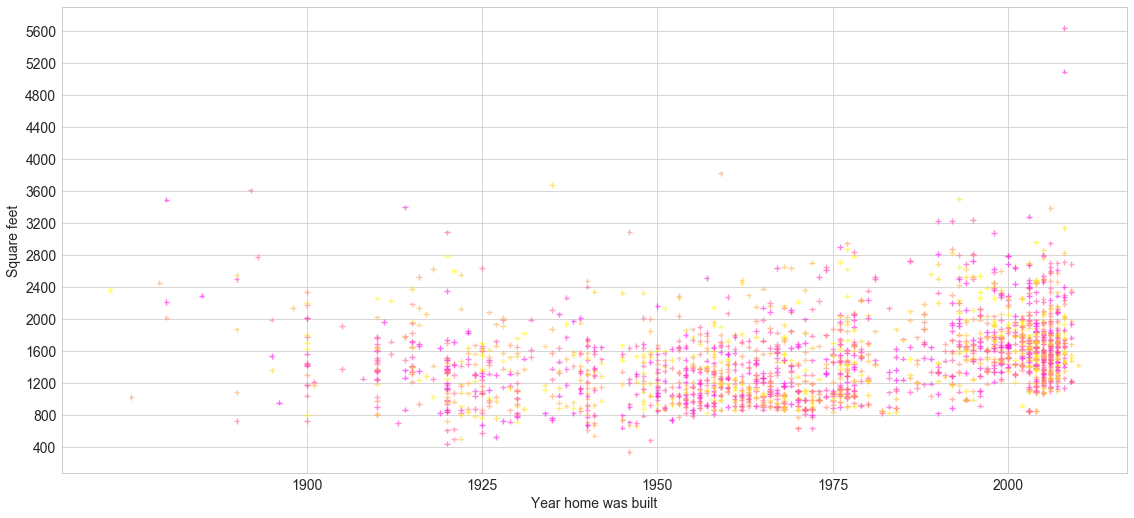

In [54]:
plt.figure(figsize=(17,8))
plt.style.use('seaborn-paper')
plt.scatter(train_dataset["Year Built"],train_dataset['Gr Liv Area'], cmap = 'spring', 
            marker = '+', alpha = 0.6, c = colors)
plt.ylabel('Square feet',{'fontsize' : 14})
plt.yticks(np.arange(400,6000,400),fontsize = 14)
plt.xlabel('Year home was built',{'fontsize' : 14})
plt.xticks(np.arange(1900,2020,25),fontsize = 14);

### Sale price vs some key categorical data

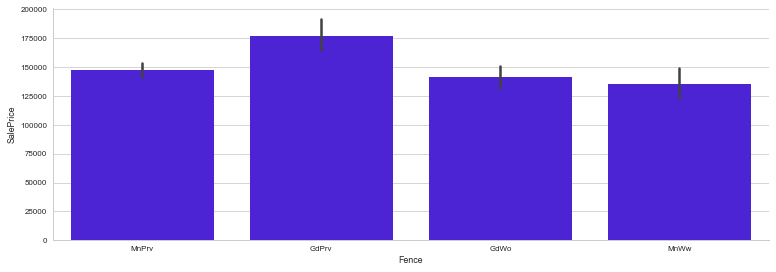

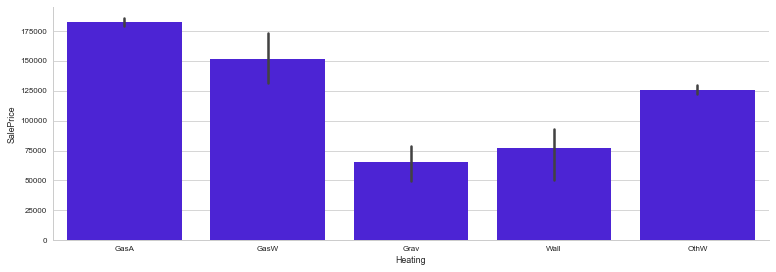

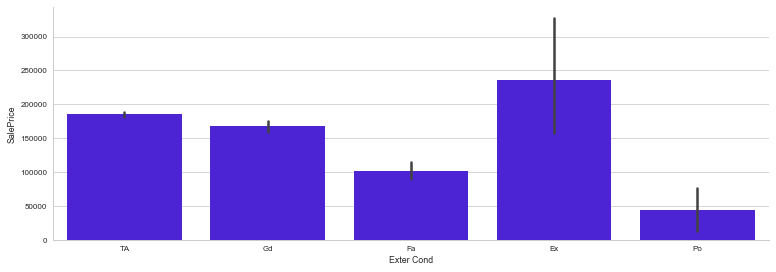

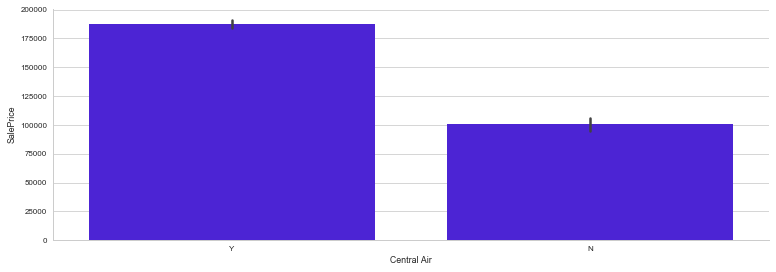

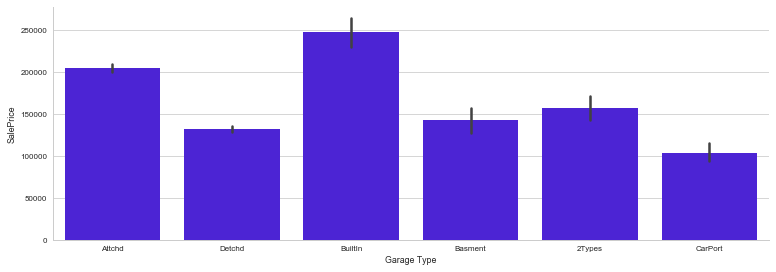

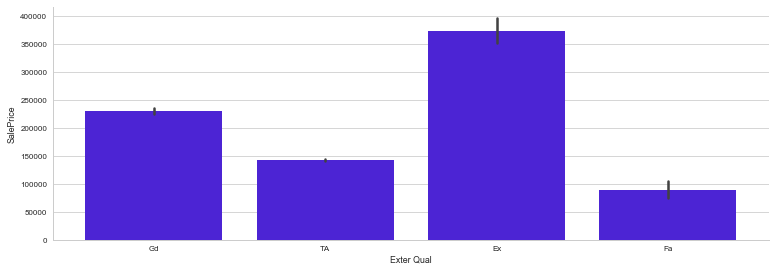

In [51]:
xcol = ['Fence','Heating','Exter Cond','Central Air','Garage Type','Exter Qual']
ycol = 'SalePrice'

plt.style.use('seaborn-whitegrid')
for x in xcol:
    sns.catplot(x = x, y = ycol, data = train_dataset, kind = 'bar',height = 4,
            aspect = 11/4, color =  '#3c07f1' );
plt.plot();


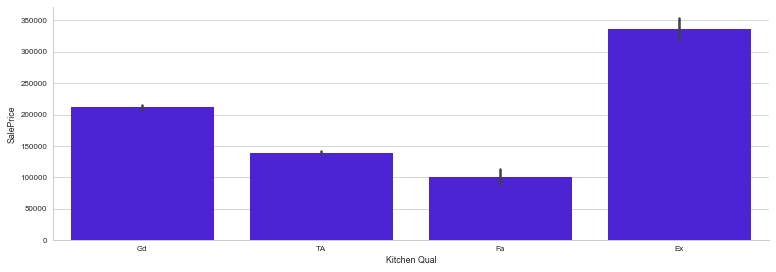

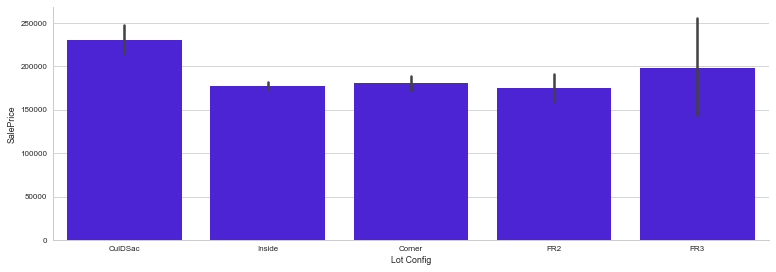

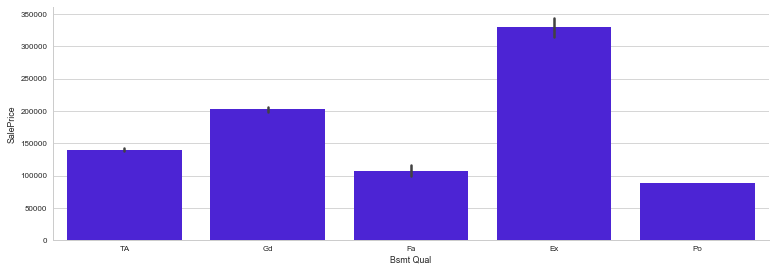

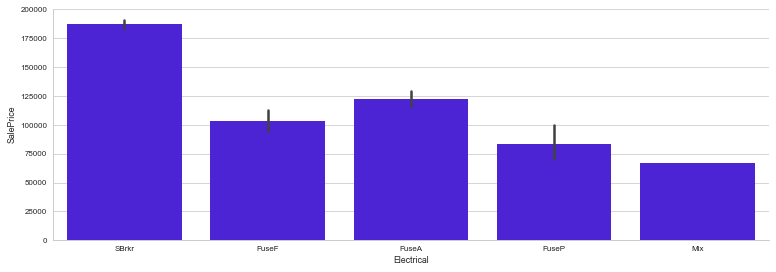

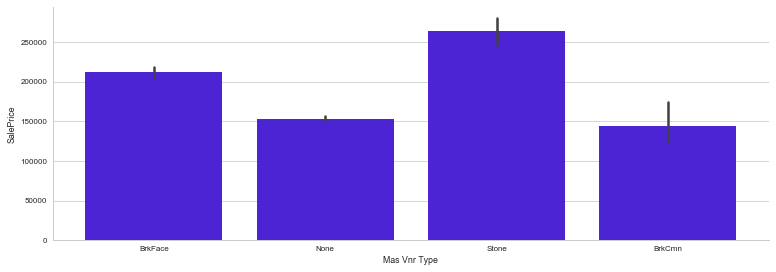

In [50]:

xcol = ['Kitchen Qual','Lot Config','Bsmt Qual','Electrical','Mas Vnr Type']
ycol = 'SalePrice'

plt.style.use('seaborn-whitegrid')
for x in xcol:
    sns.catplot(x = x, y = ycol, data = train_dataset, kind = 'bar',height = 4,
            aspect = 11/4, color =  '#3c07f1' );
plt.plot();